# Data Science Capstone Project
## Content-based restaurant recommender system

As explained on the project report, a content-based recommender system will be done in order to help users find restaurants according to their location and taste.

## Importing libraries:

In [97]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Setting user experience:

In [98]:
user_experience={'id':[   #Venue ids
                     '59714925c876c8504078d1a8',
                     '53d5c78b498e0558e5a556bd',
                     '596a440bc9a5177363d67da0',
                     '4bd4c5705631c9b61f1ea330',
                     '542199e9498e871a2c318030',
                     '5a8852b7b54618599907e3d8',
                     '4be1a9e8edbb0f47ce3ba615',
                     '4cc7036b1e596dcb881be267',
                     '545d5e2a498e842afcba2300',
                     '5b75e7aea795bd002cf07c61',
                     '4d3cc04e05b8721e5b418f37',
                     '4ba661cdf964a5205c4c39e3',
                     '4c9391e2f7cfa1cd078aab15',
                     '5021af3be4b05abb1c750c1d',
                     '4b058726f964a520578222e3',
                     '5589ee6f498ef5d2095dd8bf',
                     '4beae4fa415e20a11e99e5bb',
                     '4b61a8b4f964a520081c2ae3',
                     '4d9881a6af3d236a4b633dc7',
                     '51a52fe4498e316fd053809d',
                     '542b4862498e5692f7398fc1',
                     '582dd42f40b0602000e70aab',
                     '551430f7498e2f4b67bf5718',
                     '5668ab17498e33bdd555d0de',
                     '50f091dae4b01e114f9ddeb4',
                     '5bc4fd0ca35dce002c7cfe9d'
                  ],
                 'name':[   #Venue names
                     'Abbraccio',
                     'Vezpa Pizzas',
                     'Madero Steak House',
                     'Bráz Pizzaria',
                     'Atlântico Sushi',
                     'Gurumê',
                     'Fiametta',
                     'Outback Steakhouse',
                     'Guacamole',
                     'Kõ Bã Isakaya',
                     'Fretelli',
                     'Na Brasa Columbia',
                     'Faenza',
                     'Bla Blá Champanheria',
                     'A Polonesa',
                     'Mamma Jamma',
                     'Cícero',
                     'Balada Mix',
                     'Bibi Sucos',
                     'Bar do Adão',
                     'Bar do Elias',
                     'B de Burguer',
                     'T.T. Burguer',
                     "Hell's Burguer",
                     'Tropical Sushi',
                     'Jeronimo Burguer'
                 ],
                  'rate':[   #Venue rates
                      4,
                      3,
                      4,
                      5,
                      4,
                      4,
                      4,
                      3,
                      3,
                      4,
                      5,
                      4,
                      2,
                      4,
                      5,
                      5,
                      4,
                      4,
                      4,
                      5,
                      5,
                      3,
                      4,
                      4,
                      3,
                      5
                  ],
                 'category':[   #Venue categories
                     'Italian Restaurant',
                     'Pizza Place',
                     'Steakhouse',
                     'Pizza Place',
                     'Japanese Restaurant',
                     'Japanese Restaurant',
                     'Pizza Place',
                     'Steakhouse',
                     'Mexican Restaurant',
                     'Japanese Restaurant',
                     'Italian Restaurant',
                     'Brazilian Restaurant',
                     'Pizza Place',
                     'Cocktail Bar',
                     'Polish Restaurant',
                     'Pizza Place',
                     'Brazilian Restaurant',
                     'Salad Place',
                     'Juice Bar',
                     'Bar',
                     'Middle Eastern Restaurant',
                     'American Restaurant',
                     'American Restaurant',
                     'American Restaurant',
                     'Japanese Restaurant',
                     'American Restaurant'
                 ],
                 'category_id':[   #Venue categorie ids
                     '4bf58dd8d48988d110941735', 
                     '4bf58dd8d48988d1ca941735', 
                     '4bf58dd8d48988d1cc941735', 
                     '4bf58dd8d48988d1ca941735', 
                     '4bf58dd8d48988d111941735', 
                     '4bf58dd8d48988d111941735',
                     '4bf58dd8d48988d1ca941735',
                     '4bf58dd8d48988d1cc941735',
                     '4bf58dd8d48988d1c1941735',
                     '4bf58dd8d48988d111941735',
                     '4bf58dd8d48988d110941735',
                     '4bf58dd8d48988d16b941735', 
                     '4bf58dd8d48988d1ca941735',
                     '4bf58dd8d48988d11e941735',
                     '52e81612bcbc57f1066b7a04',
                     '4bf58dd8d48988d1ca941735',
                     '4bf58dd8d48988d16b941735',
                     '4bf58dd8d48988d1bd941735',
                     '4bf58dd8d48988d112941735',
                     '4bf58dd8d48988d116941735',
                     '4bf58dd8d48988d115941735',
                     '4bf58dd8d48988d14e941735',
                     '4bf58dd8d48988d14e941735',
                     '4bf58dd8d48988d14e941735',
                     '4bf58dd8d48988d111941735',
                     '4bf58dd8d48988d14e941735'
                 ],
                 'latitude':[    #Venue latitude
                     -23.001072,
                     -23.012933,
                     -22.997907,
                     -23.012532,
                     -23.004820,
                     -23.001362,
                     -23.001177,
                     -23.004603,
                     -23.013842,
                     -22.982640,
                     -23.012070,
                     -23.014824,
                     -23.007093,
                     -23.009402,
                     -22.967300,
                     -22.992854,
                     -23.000861,
                     -23.004137,
                     -23.010685,
                     -23.013735,
                     -23.013399,
                     -23.000821,
                     -23.010462,
                     -23.013936,
                     -23.013816,
                     -22.997562
                 ],
                 'longitude':[   #Venue longitude
                     -43.385238,
                     -43.305357,
                     -43.351359,
                     -43.311300,
                     -43.317258,
                     -43.385721,
                     -43.385492,
                     -43.317885,
                     -43.305320,
                     -43.207085,
                     -43.321520,
                     -43.305780,
                     -43.313662,
                     -43.306516,
                     -43.184685,
                     -43.362155,
                     -43.308338,
                     -43.317156,
                     -43.304787,
                     -43.305408,
                     -43.305323,
                     -43.396333,
                     -43.304699,
                     -43.305503,
                     -43.305404,
                     -43.360619
                 ]}
user_df = pd.DataFrame(user_experience)
user_df.head()

,id,name,rate,category,category_id,latitude,longitude
0,59714925c876c8504078d1a8,Abbraccio,4,Italian Restaurant,4bf58dd8d48988d110941735,-23.001072,-43.385238
1,53d5c78b498e0558e5a556bd,Vezpa Pizzas,3,Pizza Place,4bf58dd8d48988d1ca941735,-23.012933,-43.305357
2,596a440bc9a5177363d67da0,Madero Steak House,4,Steakhouse,4bf58dd8d48988d1cc941735,-22.997907,-43.351359
3,4bd4c5705631c9b61f1ea330,Bráz Pizzaria,5,Pizza Place,4bf58dd8d48988d1ca941735,-23.012532,-43.311300
4,542199e9498e871a2c318030,Atlântico Sushi,4,Japanese Restaurant,4bf58dd8d48988d111941735,-23.004820,-43.317258


## Compares number of restaurants by category and average rates:

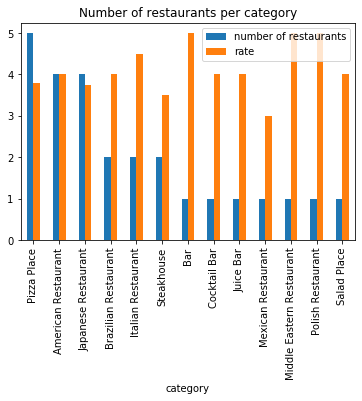

In [99]:
category_df = user_df.groupby('category').agg({'id':'count','rate':'mean'})
category_df.sort_values(by='id',inplace=True,ascending=False)
category_df.rename(columns={'id':'number of restaurants'},inplace=True)
top_5 = category_df.head().index.values
user_freq = category_df['number of restaurants']
category_df.plot.bar(title='Number of restaurants per category')


## Shows the average rate of the top 5 categories:

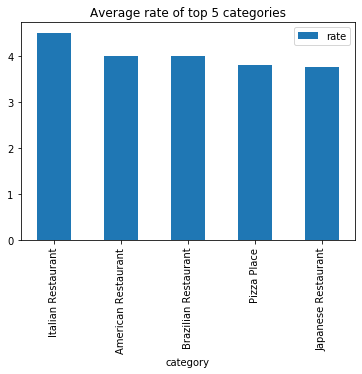

In [100]:
category_df = pd.DataFrame(user_df.groupby('category').mean()).loc[top_5]
category_df.sort_values(by='rate',inplace=True,ascending=False)
category_df.plot.bar(y='rate',title='Average rate of top 5 categories')


## Starts preparing user experience data to later create user profile:

In [101]:
user_numerical = pd.get_dummies(user_df['category'], prefix='category')
lat = -23.013493
lon = -43.309671

for column in user_numerical.columns.values:
    if column[0:8]=='category':
        user_numerical[column] = user_numerical[column]*user_df['rate']

print(user_numerical.mean(axis=0))

category_American Restaurant          0.615385
category_Bar                          0.192308
category_Brazilian Restaurant         0.307692
category_Cocktail Bar                 0.153846
category_Italian Restaurant           0.346154
category_Japanese Restaurant          0.576923
category_Juice Bar                    0.153846
category_Mexican Restaurant           0.115385
category_Middle Eastern Restaurant    0.192308
category_Pizza Place                  0.730769
category_Polish Restaurant            0.192308
category_Salad Place                  0.153846
category_Steakhouse                   0.269231
dtype: float64


## Displays user experience on map:

In [102]:

map_clusters = folium.Map(location=[lat, lon], zoom_start=11)

for i, row in user_df.iterrows():
    folium.CircleMarker(
        [row['latitude'], row['longitude']],
        radius=5,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Uses Foursquare's explore query to find restaurants with the same categories that the ones in the user profile:

In [103]:
client_id = 'BQI2NVRYXPJ2HELWIVOA4OH4YPMHFWF0LMFZABZDAJIDT5WG'
client_secret = 'AKX0R1EY2DVQ4IPXJOCYLFLQ1H2JAC5B4EYJIEDOU3TKPXS5'
version = '20180605'
radius = 6000
limit = 100
user_lat = -23.013457
user_lon = -43.309648

nearby_venues = pd.DataFrame(columns = ['id','name', 'categories', 'lat', 'lng'])

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
for category_id in set(list(user_df['category_id'])):
    url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                category_id,
                client_id, 
                client_secret, 
                version, 
                user_lat, 
                user_lon, 
                radius, 
                limit)

    results = requests.get(url).json()  
    if results['response']['totalResults'] != 0:
        venues = results['response']['groups'][0]['items']

        venues = json_normalize(venues) # flatten JSON

        # filter columns
        filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        venues = venues.loc[:, filtered_columns]

        # filter the category for each row
        venues['venue.categories'] = venues.apply(get_category_type, axis=1)

        # clean columns
        venues.columns = [col.split(".")[-1] for col in venues.columns]

        nearby_venues = nearby_venues.append(venues,ignore_index=True)

map_clusters = folium.Map(location=[lat, lon], zoom_start=11)

for i, row in nearby_venues.iterrows():
    folium.CircleMarker(
        [row['lat'], row['lng']],
        radius=5,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
       
print('{} venues were found'.format(len(nearby_venues)))

480 venues were found


## Removes from the table restaurants already known by the user:

In [104]:
    
user_categories = set(list(user_df['category']))
nearby_restaurants = pd.DataFrame(columns = ['id', 'name', 'category', 'lat','lng','distance'])
for i, row in nearby_venues.iterrows():
    if row['name'] not in set(list(user_df['name'])) and row['categories'] in user_categories:
        nearby_restaurants = nearby_restaurants.append({'id':row['id'],
                                                       'name':row['name'],
                                                       'category':row['categories'],
                                                        'lat':row['lat'],
                                                        'lng':row['lng'],
                                                       'distance':np.sqrt((row['lat']-lat)**2+(row['lng']-lon)**2)}, ignore_index=True)
nearby_restaurants.head()

,id,name,category,lat,lng,distance
0,5690184e498eb2b8e882575b,Roca Pizza,Pizza Place,-23.006686,-43.314391,0.008283
1,4c6d67f2e6b7b1f731a0a98e,Domino's Pizza,Pizza Place,-23.004728,-43.318213,0.012239
2,4d3cc04e05b8721e5b418f37,Fratelli Restaurante e Pizzaria,Italian Restaurant,-23.012080,-43.321531,0.011944
3,536ae36e498e0661bb48e067,Crusty & Yatai,Pizza Place,-22.998866,-43.329647,0.024759
4,4be54a5b2468c928e9d8ff42,Fiammetta,Pizza Place,-22.999062,-43.334493,0.028712


## Displays the new venues on map:

In [105]:
map_clusters = folium.Map(location=[lat, lon], zoom_start=11)

for i, row in nearby_restaurants.iterrows():
    folium.CircleMarker(
        [row['lat'], row['lng']],
        radius=5,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

## Compares user known restaurants by category with neighborhood availability:

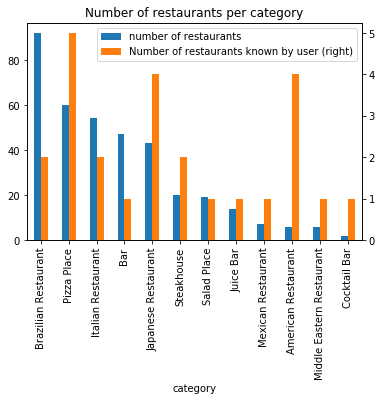

In [106]:
nearby_categories = nearby_restaurants.groupby('category').category.agg('count').to_frame('number of restaurants')
nearby_categories.sort_values(by='number of restaurants',inplace=True,ascending=False)
nearby_categories['Number of restaurants known by user'] = user_freq
nearby_categories.plot.bar(title='Number of restaurants per category',secondary_y= 'Number of restaurants known by user')

## Turns data into numerical, creating a venues matrix and user profile:

In [107]:
venues_numerical = pd.concat([pd.get_dummies(nearby_restaurants['category'], prefix='category',columns=user_categories),\
                             nearby_restaurants['distance']], axis = 1)

new_categories = [i for i in user_numerical.columns.values\
                  if i in list(venues_numerical.columns.values)]
user_profile = np.array(list(user_numerical[new_categories].sum(axis=0)\
                             /max(user_numerical[new_categories].sum(axis=0)))+[-200])

venues_matrix = np.asarray(venues_numerical)
venues_numerical.head()

,category_American Restaurant,category_Bar,category_Brazilian Restaurant,category_Cocktail Bar,category_Italian Restaurant,category_Japanese Restaurant,category_Juice Bar,category_Mexican Restaurant,category_Middle Eastern Restaurant,category_Pizza Place,category_Salad Place,category_Steakhouse,distance
0,0,0,0,0,0,0,0,0,0,1,0,0,0.008283
1,0,0,0,0,0,0,0,0,0,1,0,0,0.012239
2,0,0,0,0,1,0,0,0,0,0,0,0,0.011944
3,0,0,0,0,0,0,0,0,0,1,0,0,0.024759
4,0,0,0,0,0,0,0,0,0,1,0,0,0.028712


## Multiplies the new venues matrix by the user profile, generating the recommendation array:

In [108]:
recom_matrix = np.dot(venues_matrix,user_profile.transpose())

## Adds recommendation column to the new venues table:

In [109]:
recom_df = pd.DataFrame({'Recommendation':recom_matrix})
nearby_restaurants = pd.concat([nearby_restaurants,recom_df],\
                              axis=1)
top_ten = nearby_restaurants.sort_values(by=['Recommendation'],ascending = False).head(10)
top_ten

,id,name,category,lat,lng,distance,Recommendation
11,4c81acfed4e2370464956088,Pizzaria Zona Sul,Pizza Place,-23.012214,-43.311411,0.002160,0.568043
36,587c01a8c7ec6b7a1e21b1ad,Skipper 1992 Pizza Bar,Pizza Place,-23.013088,-43.305379,0.004311,0.137705
12,4c0bd1fda1b32d7f2c899bf0,Capricciosa,Pizza Place,-23.013811,-43.305366,0.004317,0.136652
340,4bcbaaa368f976b0af9d6183,Pe'ahi,Japanese Restaurant,-23.014807,-43.306366,0.003556,0.078222
104,4e9d880010814f7188b647d2,Gero,Italian Restaurant,-23.012820,-43.311783,0.002217,0.030332
327,50b9ff41e4b05d6264f5dd43,Japa Jato,Japanese Restaurant,-23.013463,-43.305665,0.004006,-0.011753
347,4c1ba65ab4e62d7f6bb7d993,Koni Store,Japanese Restaurant,-23.012976,-43.305392,0.004311,-0.072640
5,4d702dbc516b8cfa1af25d10,Mr Lenha - Pizzaria e Restaurante,Pizza Place,-23.009028,-43.305679,0.005989,-0.197892
40,4eb5abee469073bbc64345de,Domino's Pizza,Pizza Place,-23.009882,-43.304617,0.006211,-0.242207
91,4b8aa188f964a520487632e3,Barraca do Pepê,Juice Bar,-23.014555,-43.311790,0.002370,-0.263548


## Displays top 10 recommendations on map:

In [110]:
map_clusters = folium.Map(location=[lat, lon], zoom_start=11)

for i, row in top_ten.iterrows():
    folium.CircleMarker(
        [row['lat'], row['lng']],
        radius=5,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

## Displays top 10 venue categories:

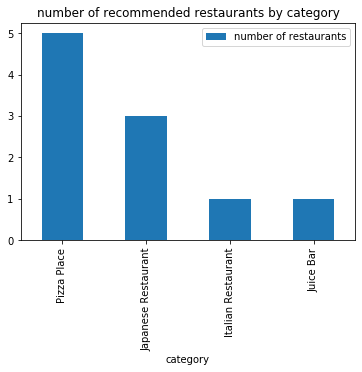

In [111]:
top_ten.groupby(by='category').category.agg('count').to_frame('number of restaurants')\
        .sort_values(['number of restaurants'], ascending = False)\
        .plot.bar(title = 'number of recommended restaurants by category')